# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

This BIOS512 Final Project will focus on an April 2024 tidytuesday dataset called `outer_space_objects.csv`. The data comes from the United Nations Office for Outer Space Affairs since 1962.

First, we will load in the `tidyverse` package and the dataset.

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-04-23/outer_space_objects.csv'
df = read_csv(url)
df |> head()

Rows: 1175 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Entity, Code
dbl (2): Year, num_objects

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Entity,Code,Year,num_objects
<chr>,<chr>,<dbl>,<dbl>
APSCO,NA,2023,1
Algeria,DZA,2002,1
Algeria,DZA,2010,1
Algeria,DZA,2016,3
Algeria,DZA,2017,1
Angola,AGO,2017,1


The file has data on the entity (usually a country, but also has data for the world as a whole), code, year, and number of objects launched. Using this data, we can answer a few questions:
1) What country has launched the most objects into space to date?
2) Are there any spikes in space object launches? (Particularly among the countries that launch the most objects into space in general.)

To answer the first question, we can start by plotting a simple horizontal bar chart of the top few countries by total number of objects launched. To do this, we first filter out the 'World' entity, and then use forcats functions to mutate the data to consolidate all the other countrys into an 'Other' category before piping it into `ggplot`.

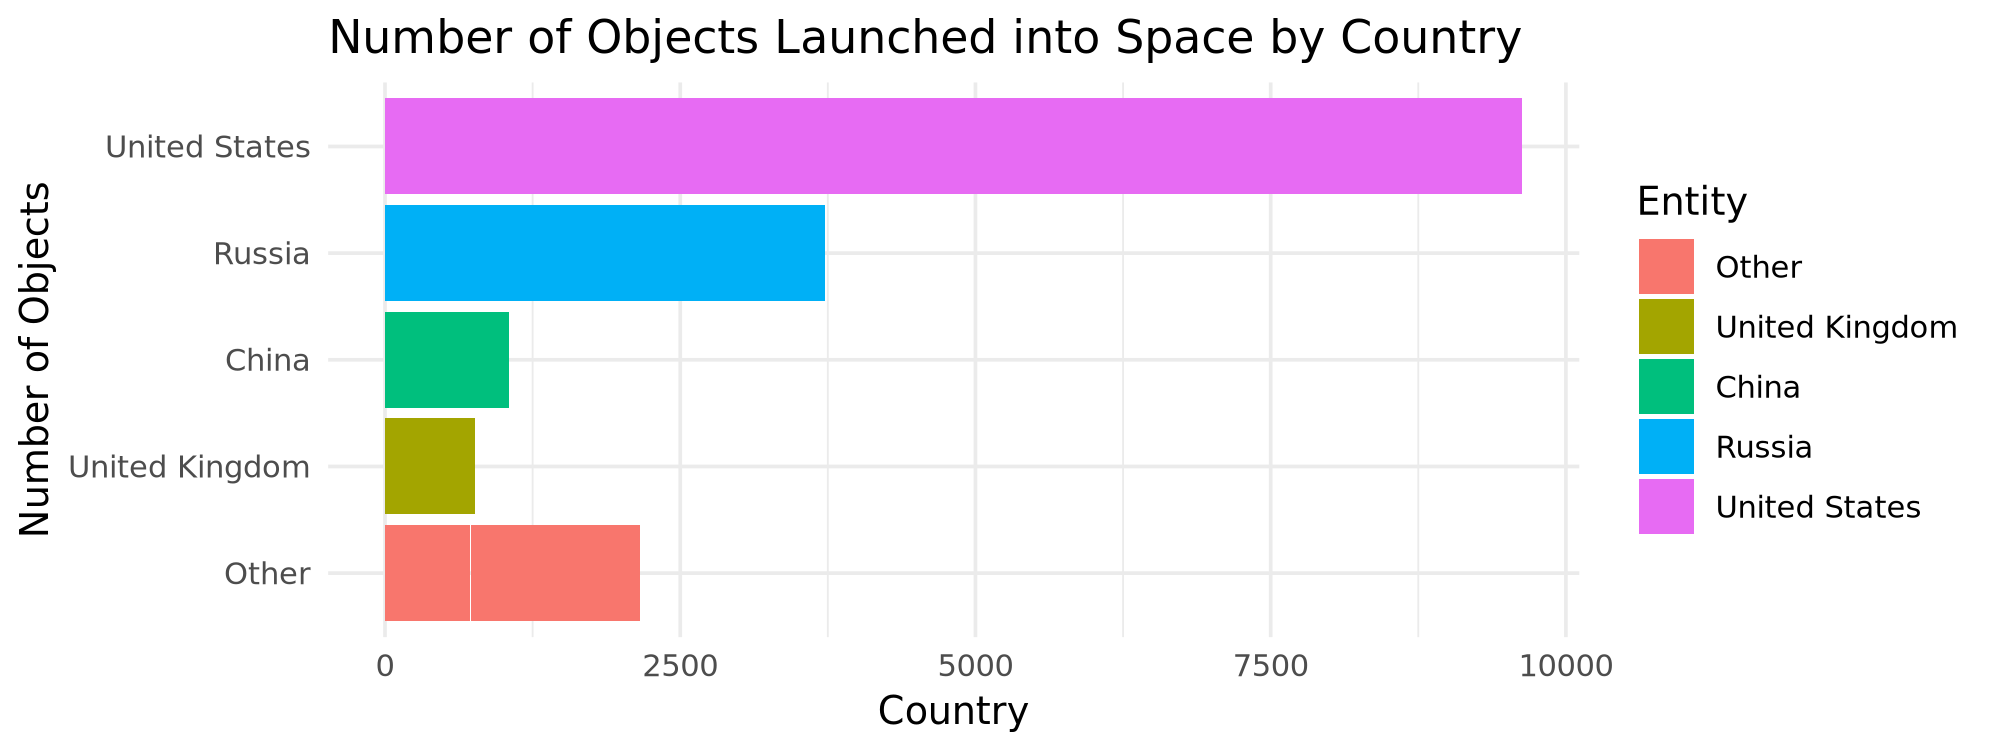

In [3]:
options(repr.plot.width = 8)

df |>
  filter(Entity != "World") |>
    mutate(Entity = fct_lump_n(Entity, w = num_objects, n = 4) |>
           fct_infreq(w = num_objects) |>
           fct_relevel('Other', after = Inf) |>
             fct_rev()) |>
ggplot(aes(y = Entity, x = num_objects, fill = Entity)) +
    geom_col() +
    theme_minimal() +
    labs(title = 'Number of Objects Launched into Space by Country',
         subtitile = 'Data from the United Nations for Outer Space Affairs',
         x = 'Country',
         y = 'Number of Objects')

It looks like the United States wins by a mile. Now that we have the names of the countries that launched the most space objects, we can create a line chart to visualize the number of objects that these countries launched into space over time and answer question 2.

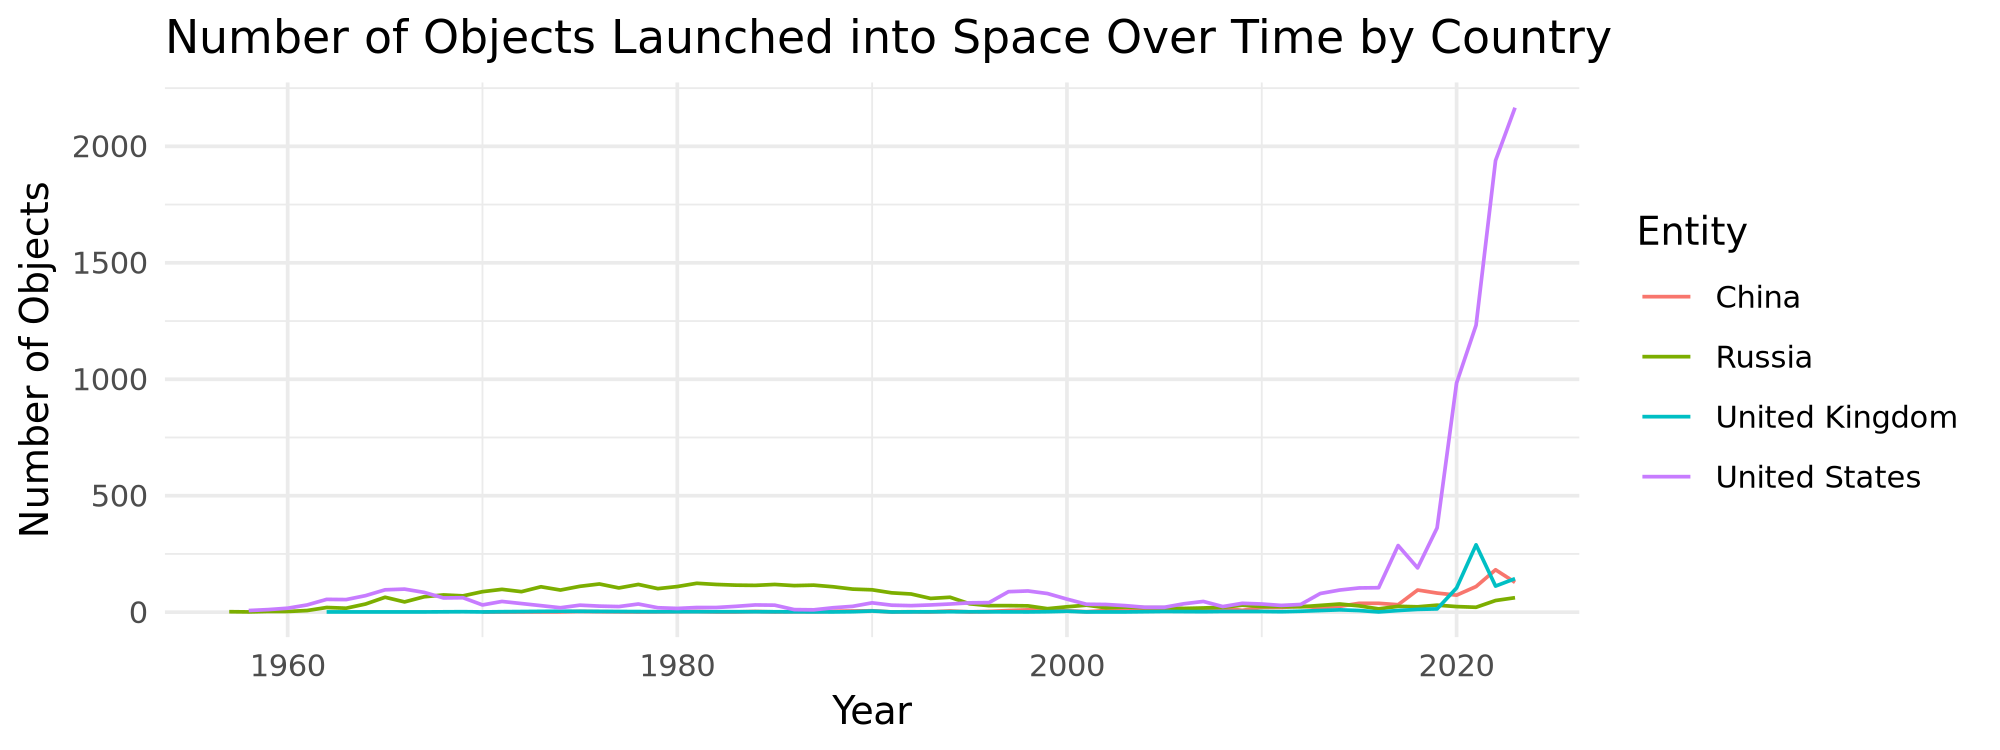

In [4]:
df |>
    filter(Entity %in% c('United States', 'Russia', 'United Kingdom', 'China')) |>
    ggplot(aes(x = Year, y = num_objects, color = Entity)) +
    geom_line() +
    theme_minimal() +
    labs(title = 'Number of Objects Launched into Space Over Time by Country',
        x = 'Year',
        y = 'Number of Objects')

We see that the United States and Russia started launching objects into space in the 1960s, which reflects the historic Space Race.

It looks like there is a very severe spike in the number of objects sent into space by the United States starting in 2010. This was due to US investments into companies such as SpaceX and Blue Origin.

Does World data reflect this trend?

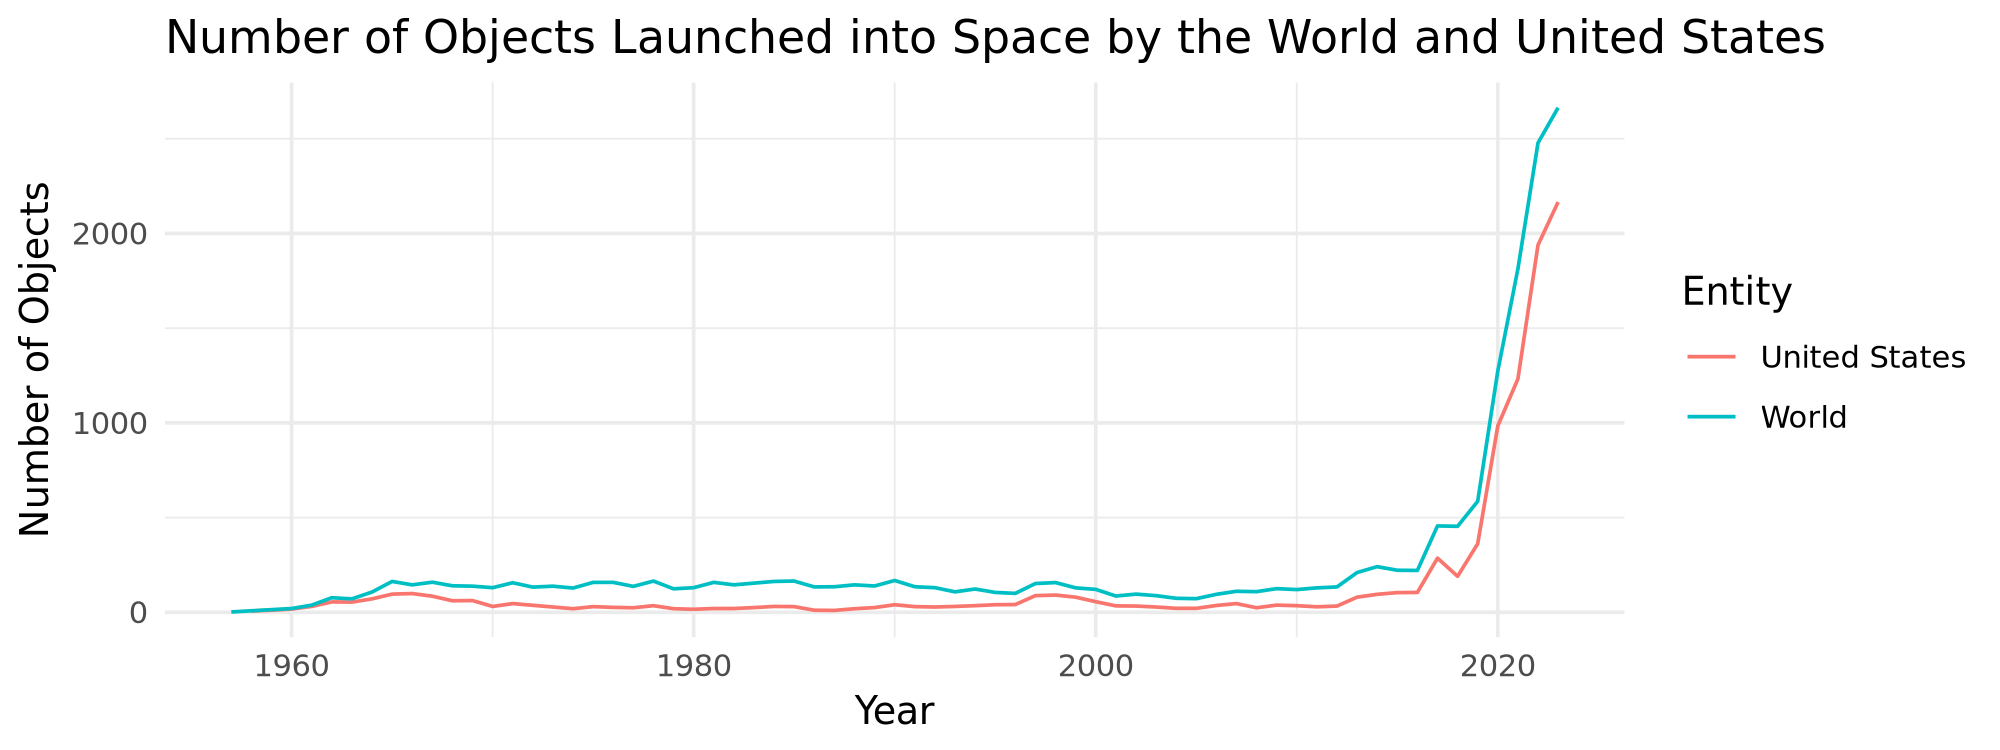

In [5]:
options(repr.plot.width = 8)
df |>
    filter(Entity %in% c('United States', 'World')) |>
    ggplot(aes(x = Year, y = num_objects, color = Entity)) +
    geom_line() +
    theme_minimal() +
    labs(title = 'Number of Objects Launched into Space by the World and United States', x = 'Year', y = 'Number of Objects')

Yes it does! We can see that United States trend very closely follows the World trend as well.

So, from analysis, we have concluded that the countries that launched the most objects in space are the United States, Russia, China, and the United Kingdom. We also found out that the United States is responsible for the vast majority of current day launches. This is due to the recent investments into space companies in the United States.